<a href="https://colab.research.google.com/github/askysrsh/AI/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout


In [ ]:
data_path = "/content/drive/MyDrive/brain_tumor_dataset"

In [ ]:
im = cv2.imread('/content/drive/MyDrive/brain_tumor_dataset/yes/Y1.jpg')
print(im.shape)

(218, 180, 3)


In [ ]:
#augmentation configuration for training
train_DataGen = ImageDataGenerator(
                                   rescale = 1./255,
                                   rotation_range = 20,
                                   validation_split = 0.2
                                   )

In [ ]:
training_data = train_DataGen.flow_from_directory(
                                                  directory = data_path,
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode = 'binary',
                                                  subset = 'training'
                                                 )


Found 211 images belonging to 2 classes.


In [ ]:
validation_data = train_DataGen.flow_from_directory(
                                                    directory = data_path,
                                                    target_size = (128,128),
                                                    batch_size = 3,
                                                    class_mode = 'binary',
                                                    subset = 'validation'
                                                   )

Found 52 images belonging to 2 classes.


In [ ]:
# Training data class labels:
training_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

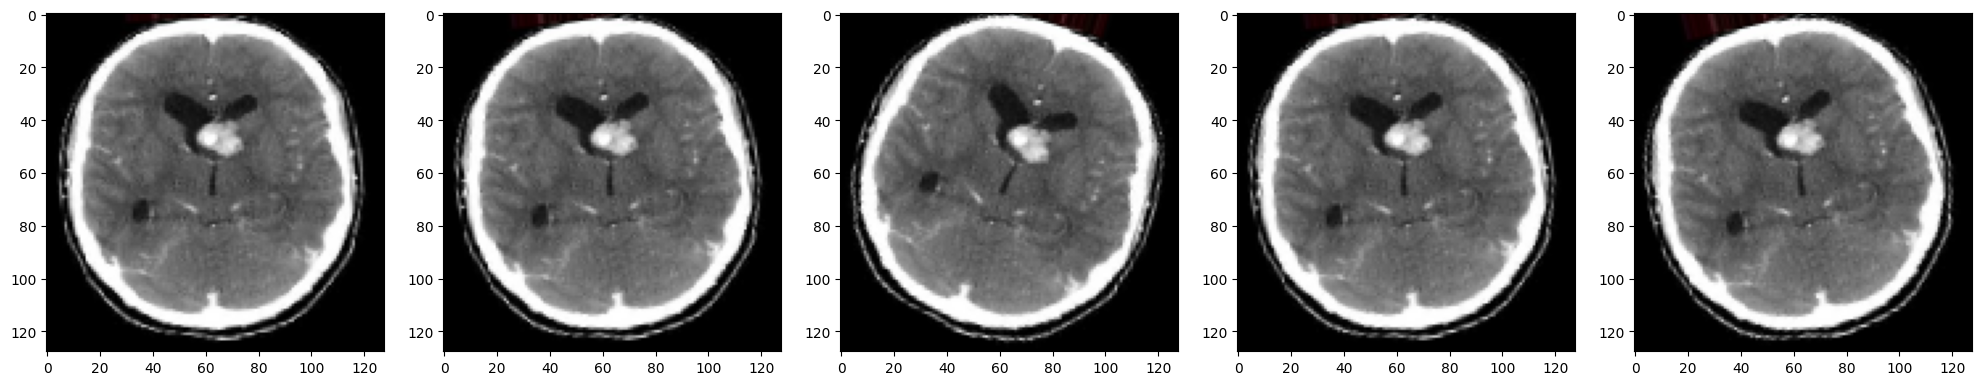

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:

# Creating model:
model = Sequential()
model.add(Conv2D(input_shape = (128,128,3), activation = 'relu', filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 256, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(2, activation = 'softmax'))



In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(
              optimizer = Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
                                            monitor='val_loss',
                                            mode = 'min',
                                            patience=5
                                           )

In [ ]:
history = model.fit(
                              training_data,
                              validation_data = validation_data,
                              epochs = 100,
                              verbose = 0,
                              shuffle = True,
                              callbacks = [callback]
)

In [ ]:
len(history.history['loss'])

10

In [ ]:
results = model.evaluate(validation_data)
results

18/18 [==============================] - 0s 23ms/step - loss: 0.6409 - accuracy: 0.6923


[0.6409092545509338, 0.692307710647583]

In [ ]:
print('Test accuracy : ', results[1])

Test accuracy :  0.692307710647583


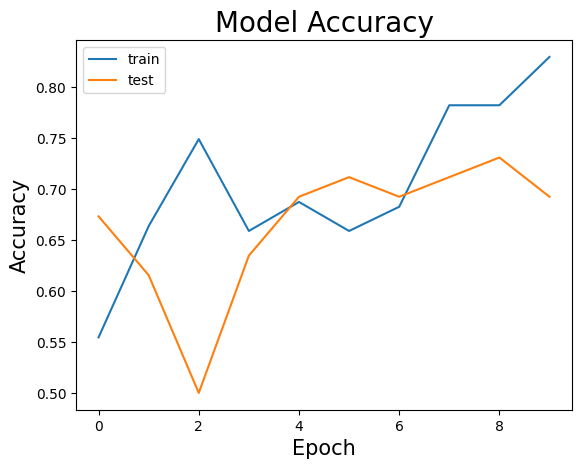

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

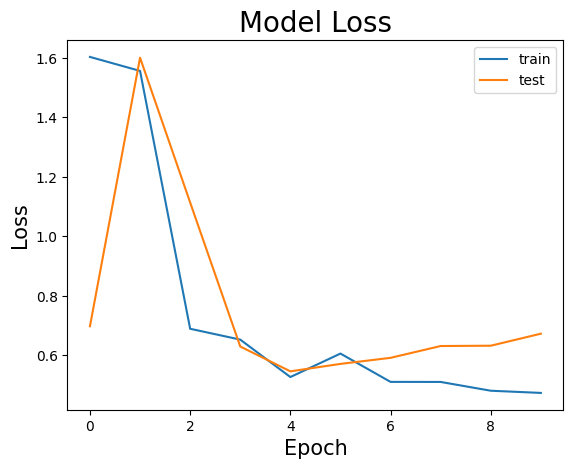

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc='upper right')
plt.show()